=== Running OLAP Queries ===


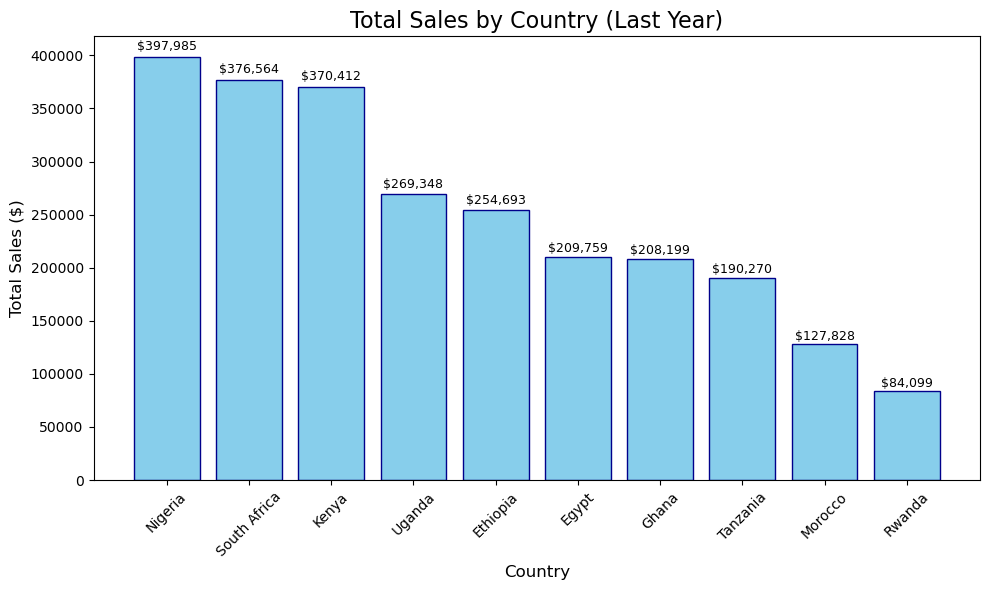

✅ Visualization saved as 'visualization_sales_by_country.png'


In [1]:
# run_olap.py
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

print("=== Running OLAP Queries ===")

# Connect to the database
conn = sqlite3.connect('retail_dw.db')

# Query 1: Roll-up → Sales by Country and Quarter
query1 = """
SELECT 
    c.Country,
    SUM(s.TotalSales) AS TotalSales
FROM SalesFact s
JOIN CustomerDim c ON s.CustomerKey = c.CustomerKey
GROUP BY c.Country
ORDER BY TotalSales DESC;
"""
country_sales = pd.read_sql(query1, conn)

# Visualization: Bar Chart of Sales by Country
plt.figure(figsize=(10, 6))
bars = plt.bar(country_sales['Country'], country_sales['TotalSales'], color='skyblue', edgecolor='darkblue')
plt.title('Total Sales by Country (Last Year)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(yval*0.01, 50), f'${yval:,.0f}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('visualization_sales_by_country.png', dpi=150)
plt.show()

print("✅ Visualization saved as 'visualization_sales_by_country.png'")

# Close connection
conn.close()